In [80]:
# Se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Se importa el data set y comienzo a analizar los datos
df = pd.read_csv('/content/drive/MyDrive/ALZHEIMER PROYECTO BIG DATA/DATA/alzheimers_disease_data.csv')

In [43]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [44]:
# Apartado A.Descripción de las características de los datos
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas del dataset:\n", df.head())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nEstadísticas descriptivas:\n", df.describe())


Dimensiones del dataset: (2149, 35)

Primeras filas del dataset:
    PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

  

In [46]:
# Cuento las filas duplicadas en el DataFrame
sum(df.duplicated())

0

In [47]:
# Elimino las columnas innecesarias del DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [49]:
# Identifico columnas numéricas: las columnas con más de 10 valores únicos se consideran numéricas
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

In [50]:
# Identifico columnas categóricas: columnas que no son numéricas y no son de 'Diagnóstico'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

In [51]:
# Etiquetas personalizadas para las columnas categóricas
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

In [52]:
# Paso. Apartado B. Identificación de patrones o tendencias significativas
# Distribución de la variable objetivo
if '' in df.columns:  # Se cambia 'Class' la columna objetivo que tiene otro nombre
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Class', data=df, palette='viridis')
    plt.title("Distribución de la variable objetivo")
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.show()


<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


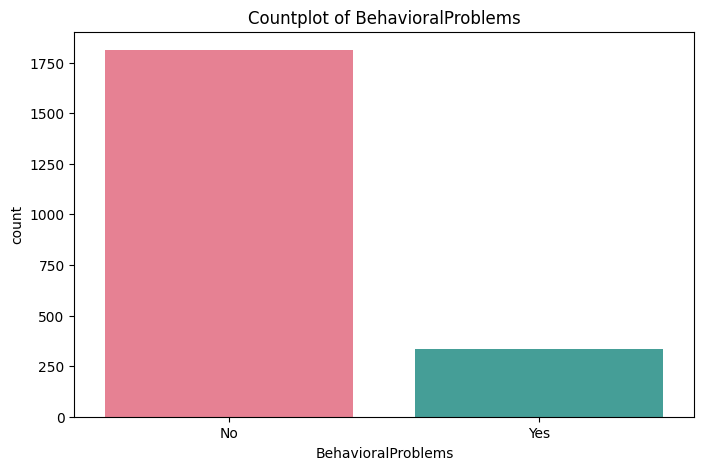

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


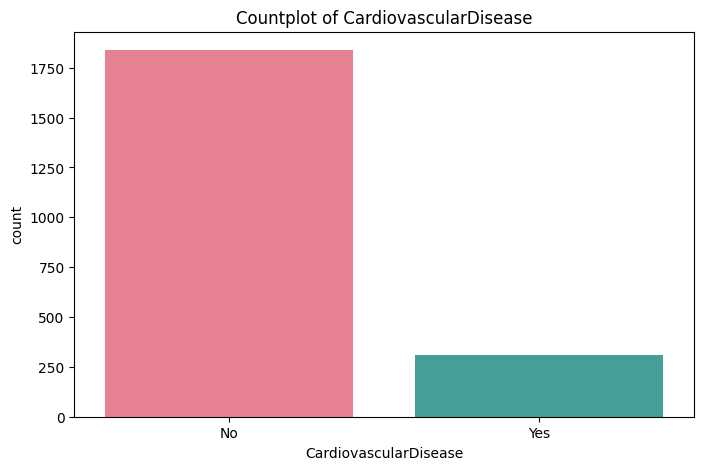

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


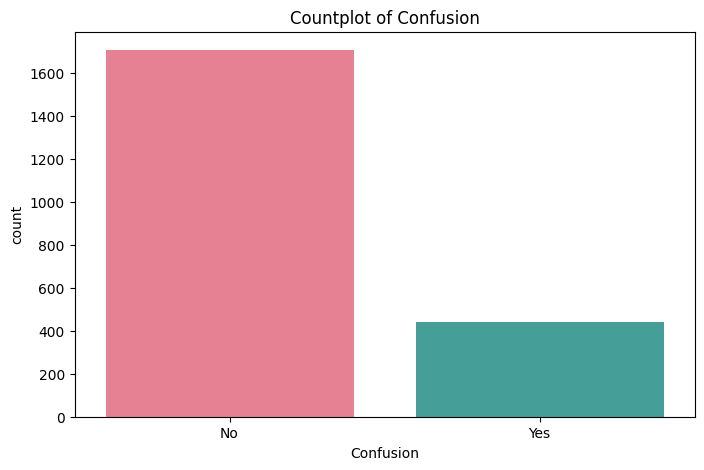

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


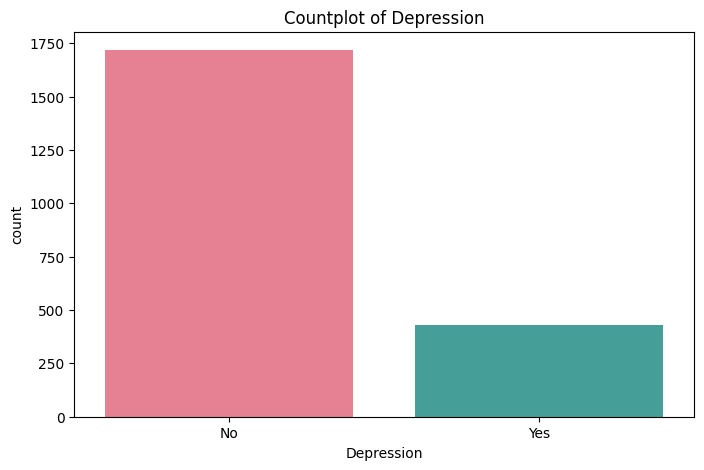

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


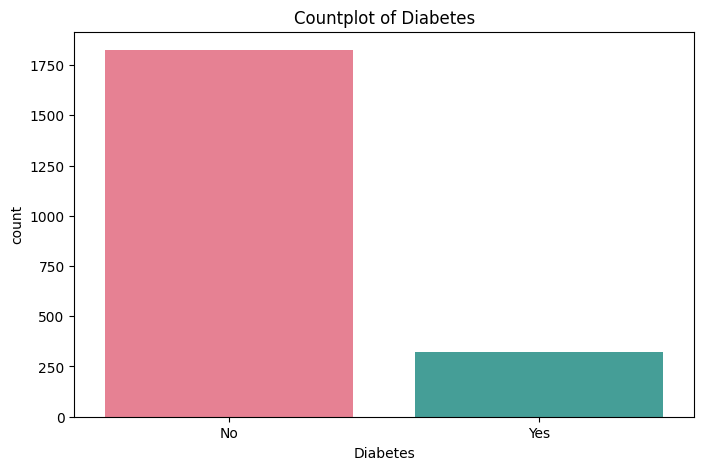

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


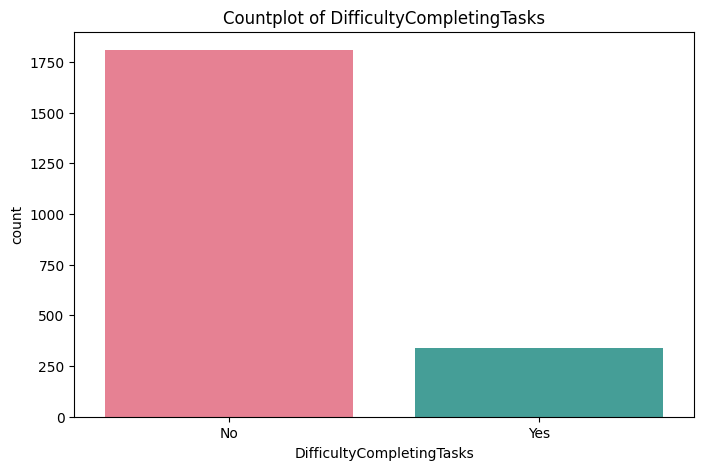

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


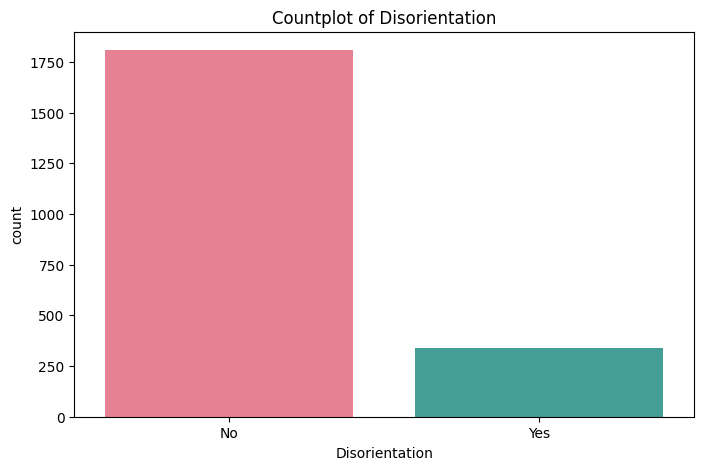

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


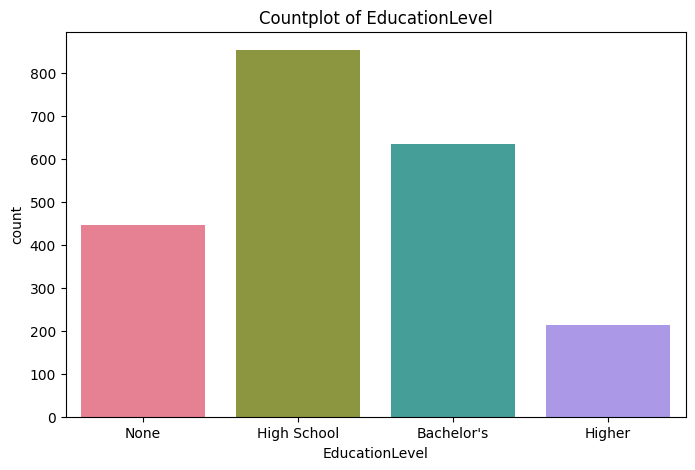

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


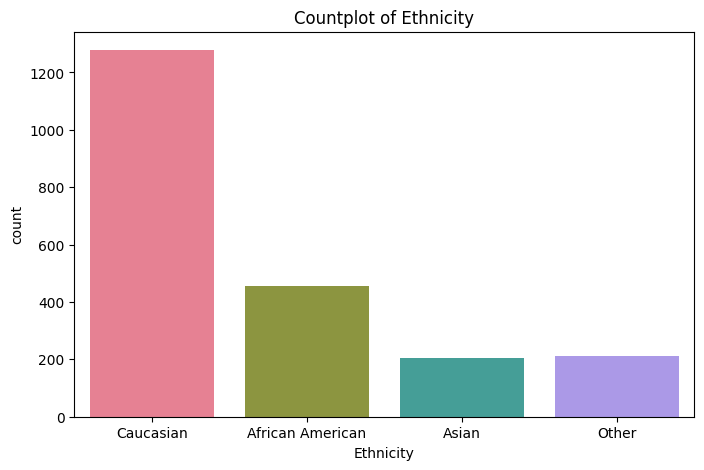

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


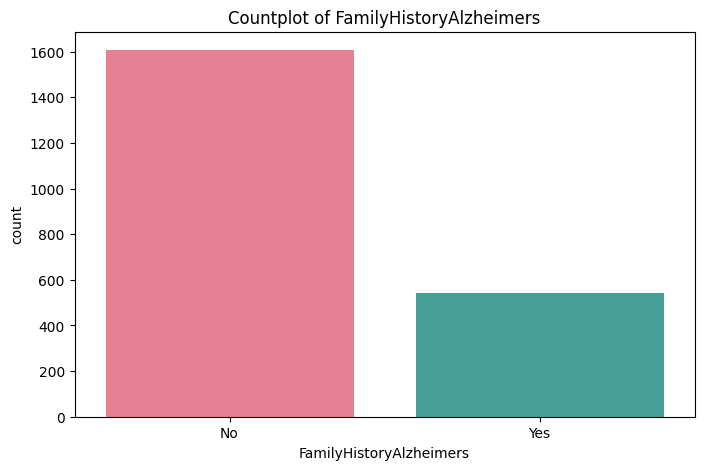

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


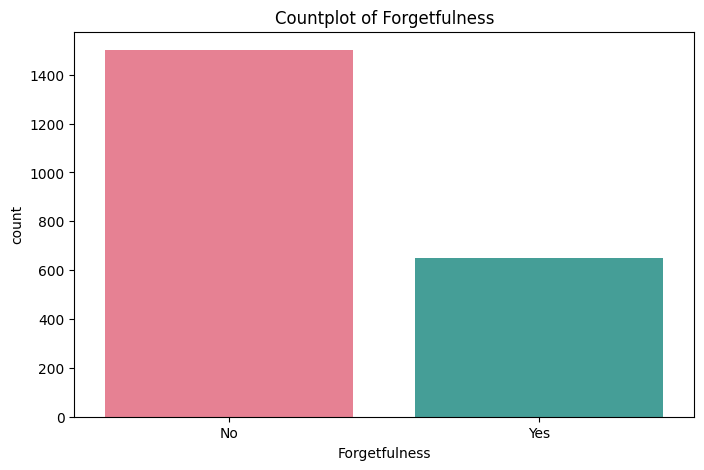

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


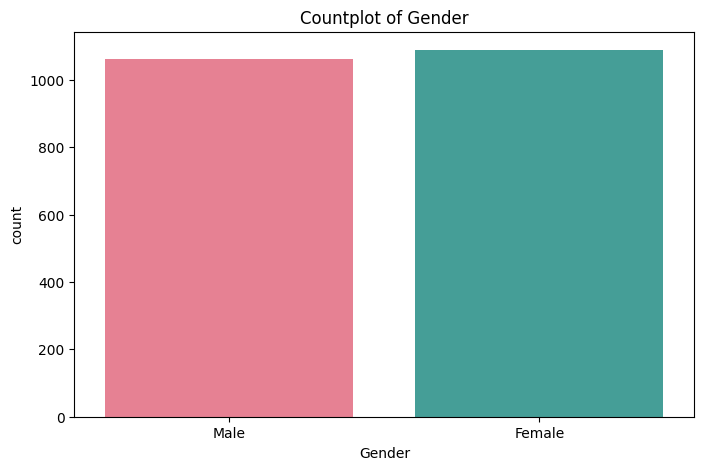

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


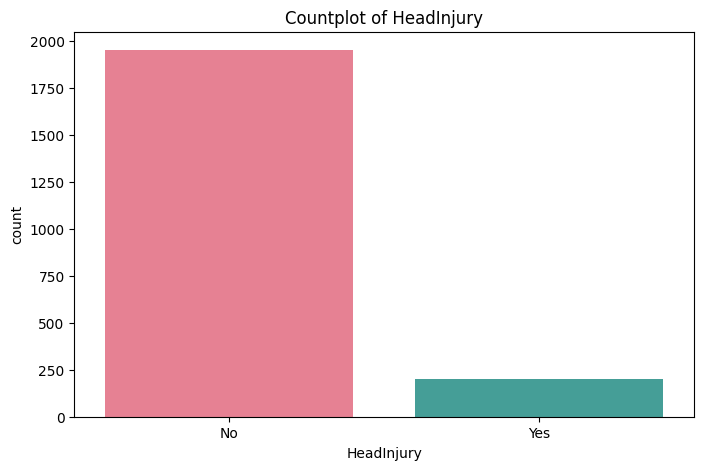

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


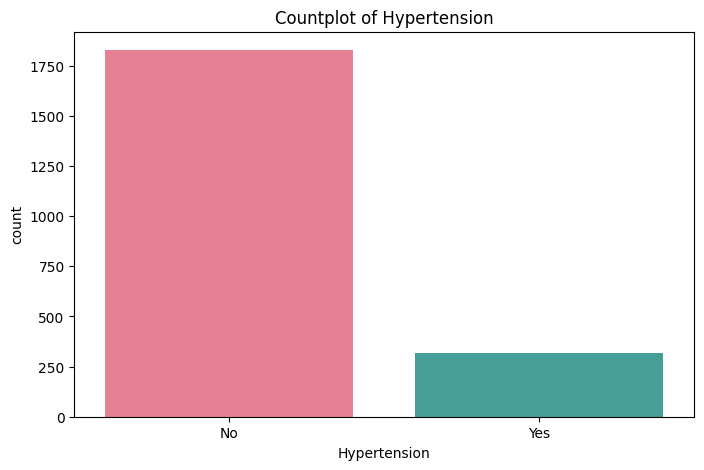

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


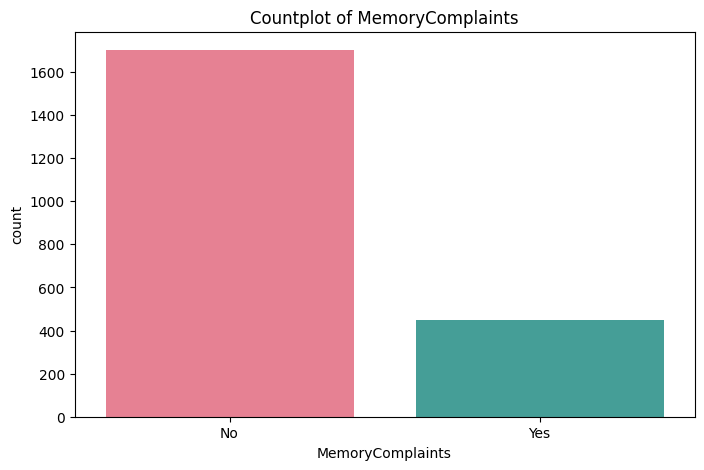

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


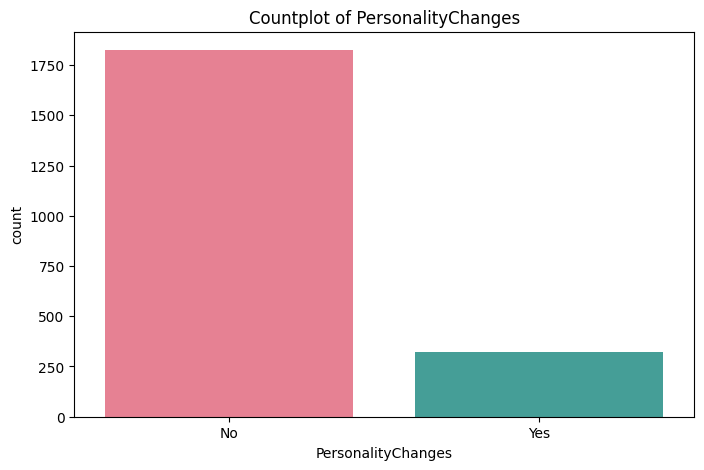

<ipython-input-54-83a793bd2df4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='husl')


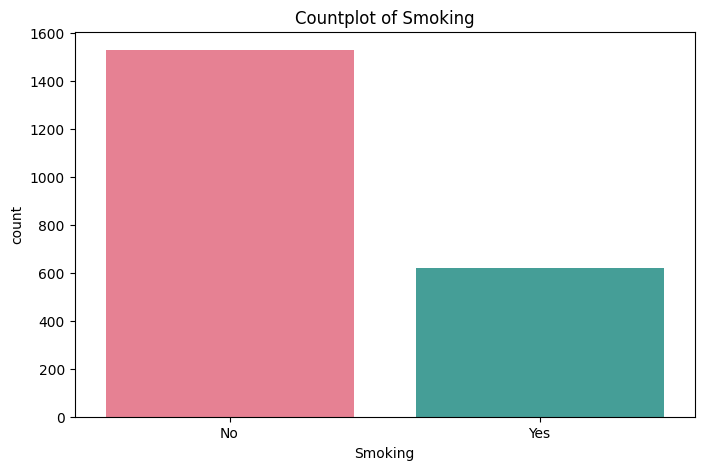

In [54]:
# Trazo gráficos de recuento para cada columna categórica
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='husl')
    plt.title(f'Countplot of {column}')

# Estableco etiquetas personalizadas directamente
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

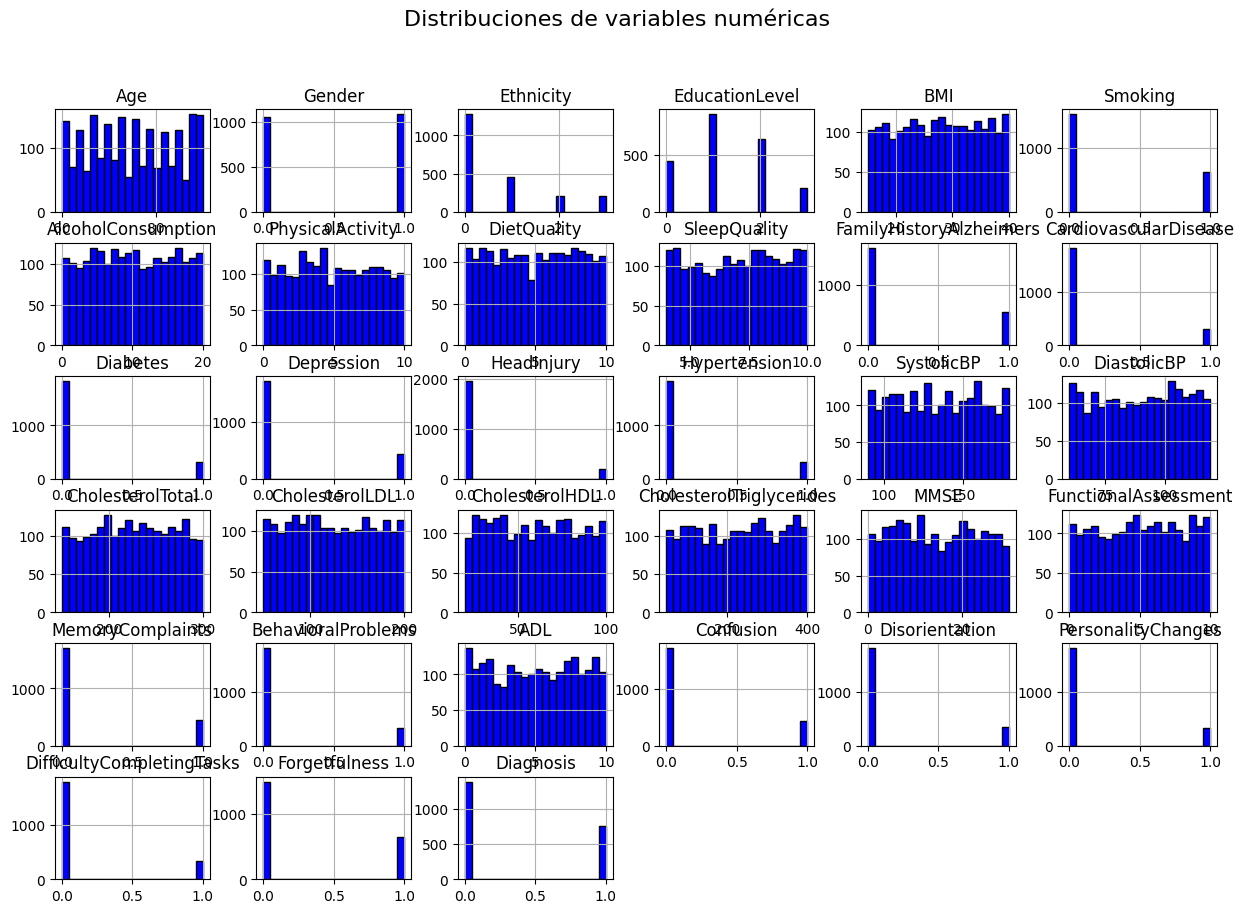

In [55]:
#Distribuciones de variables numéricas
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[num_columns].hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.show()

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


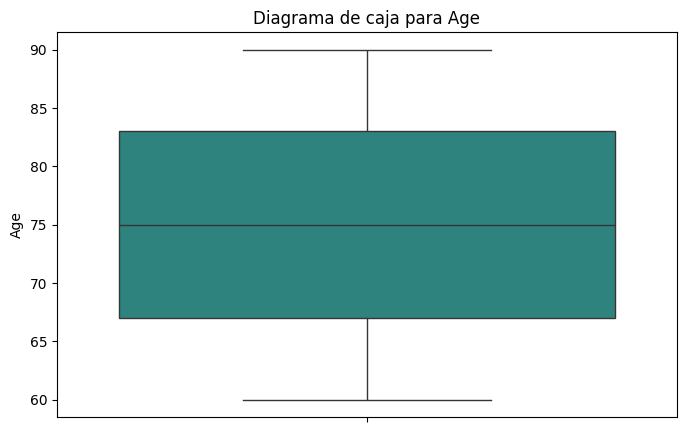

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


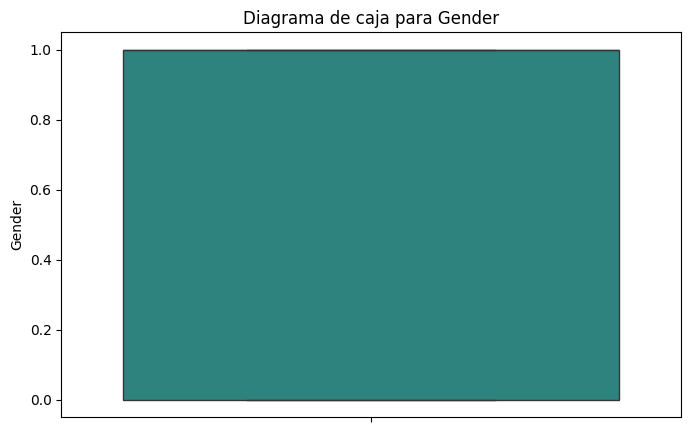

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


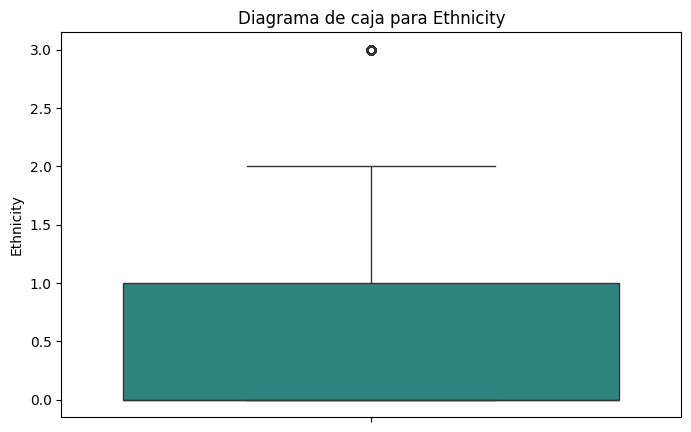

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


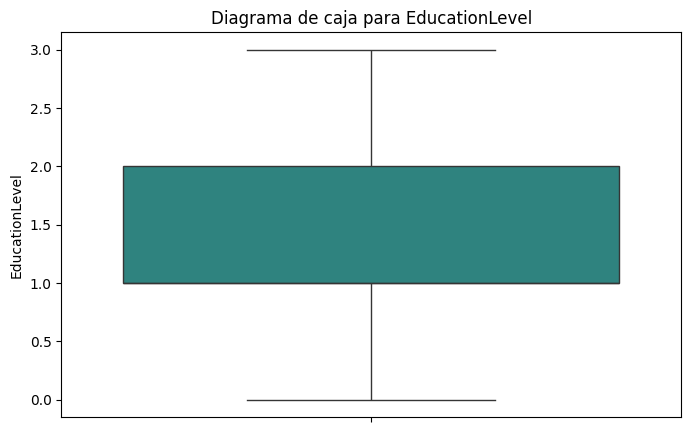

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


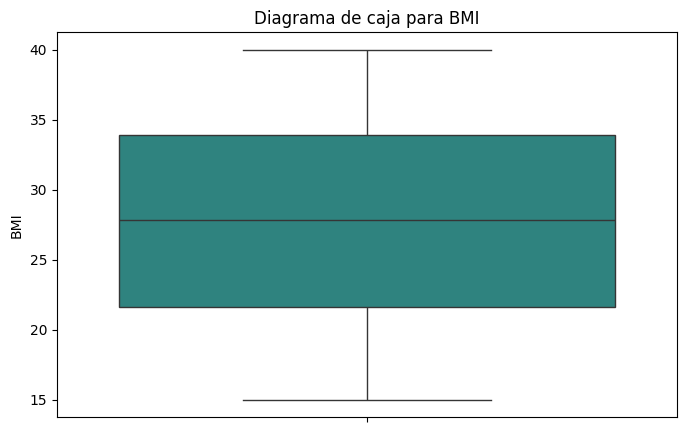

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


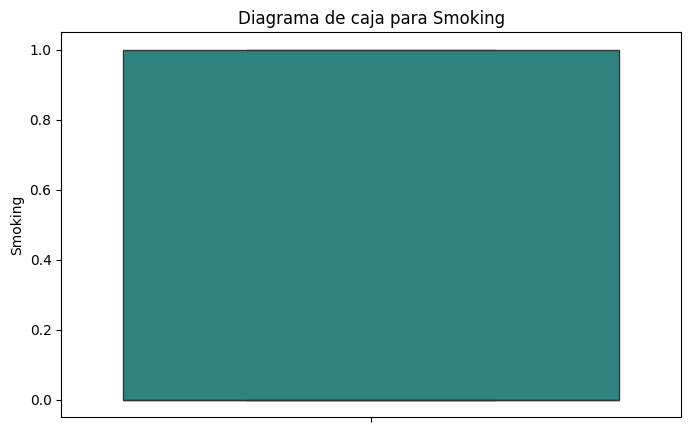

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


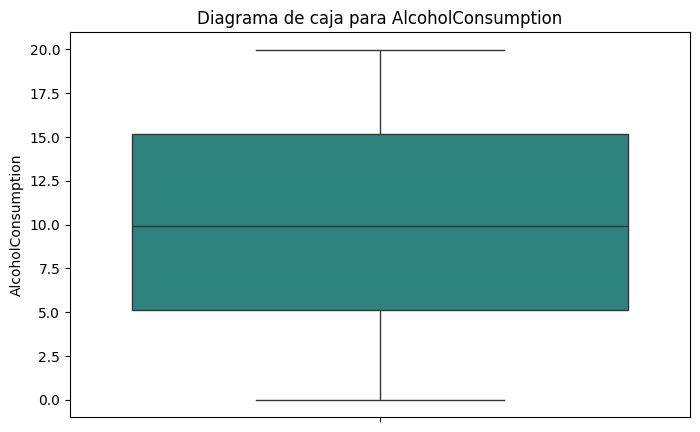

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


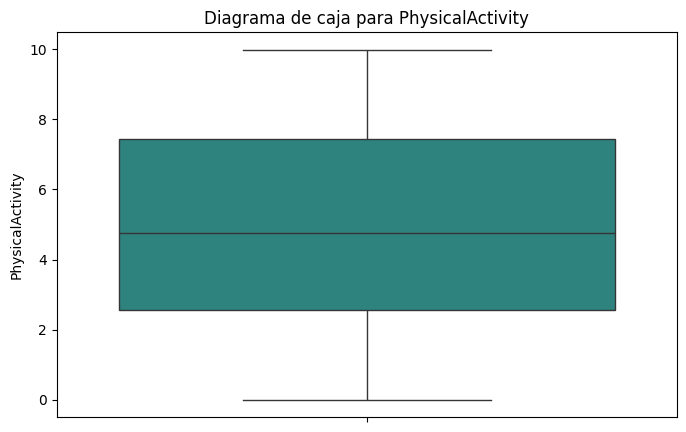

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


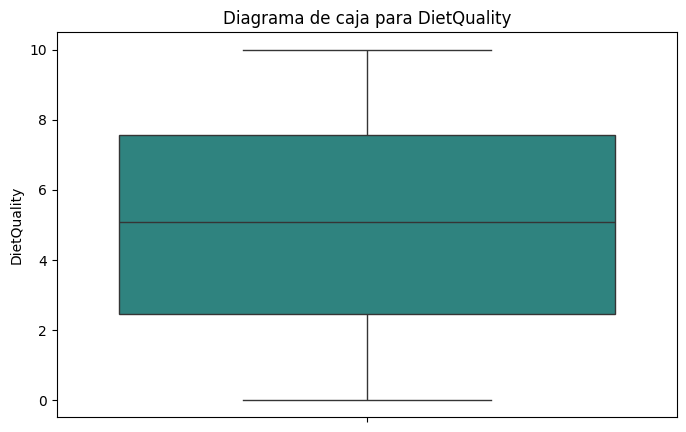

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


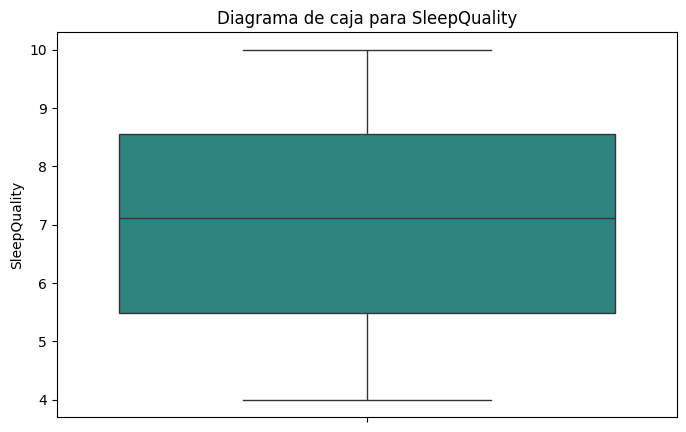

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


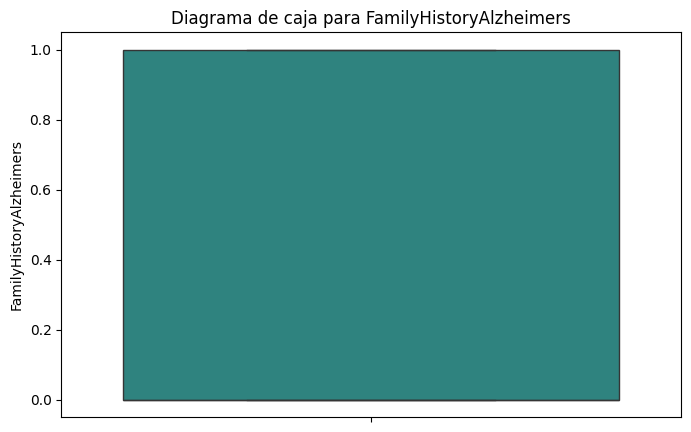

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


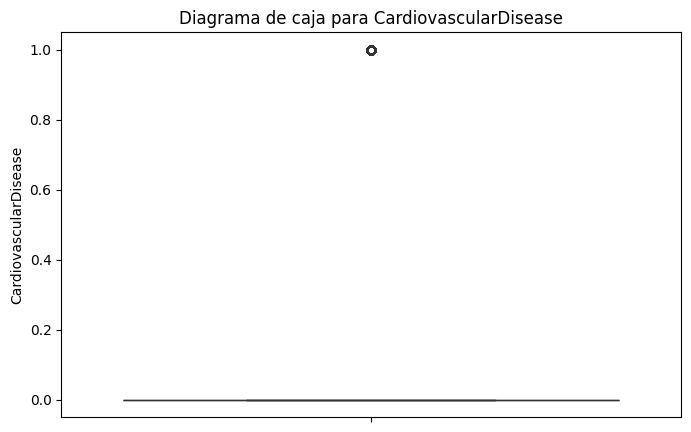

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


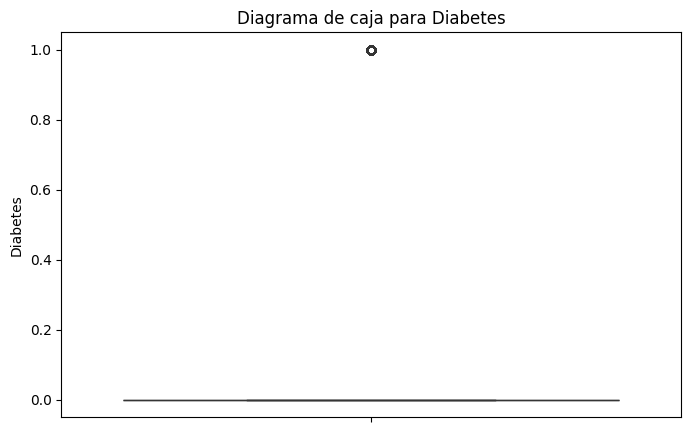

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


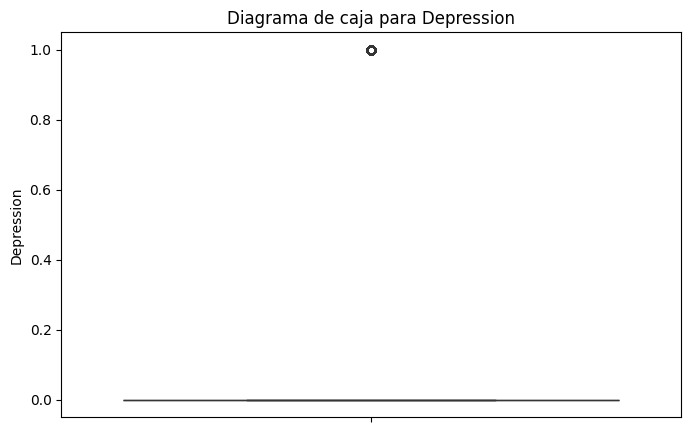

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


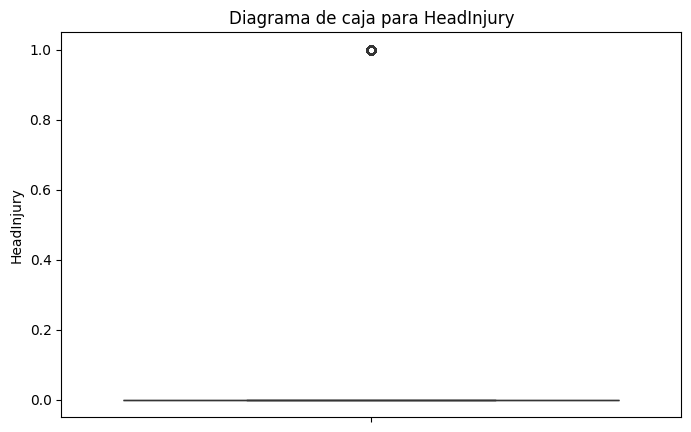

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


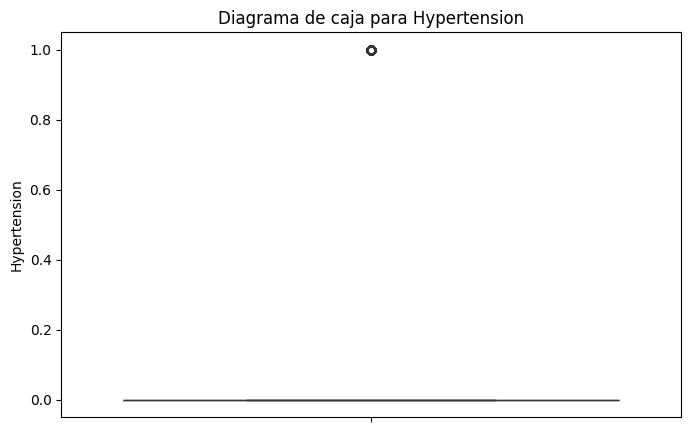

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


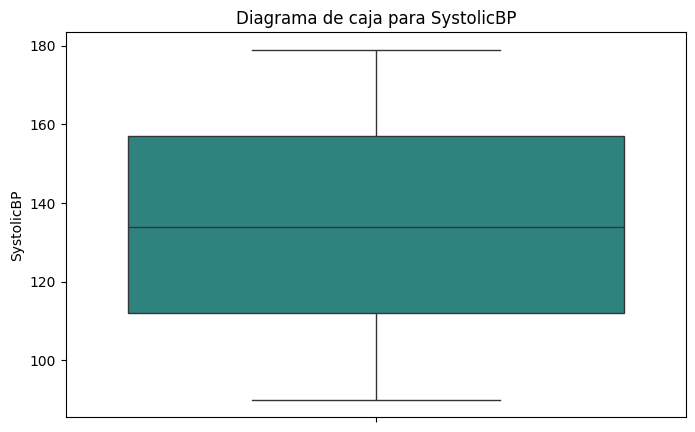

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


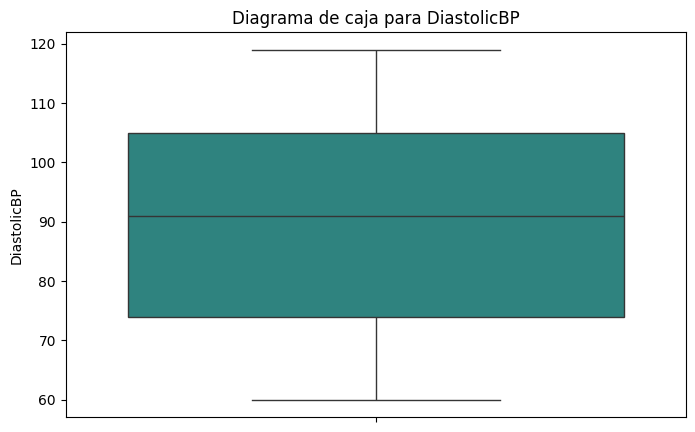

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


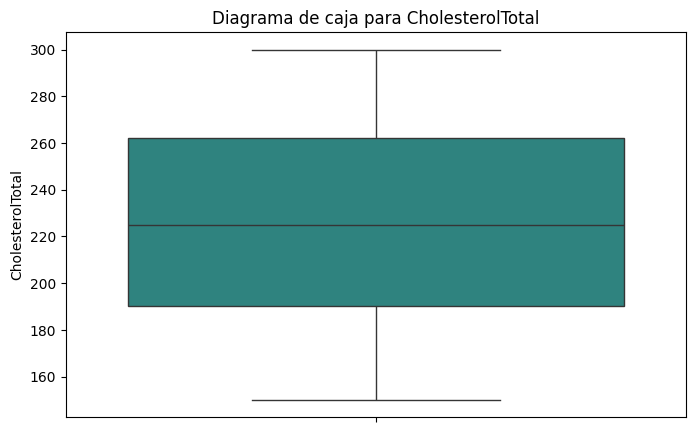

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


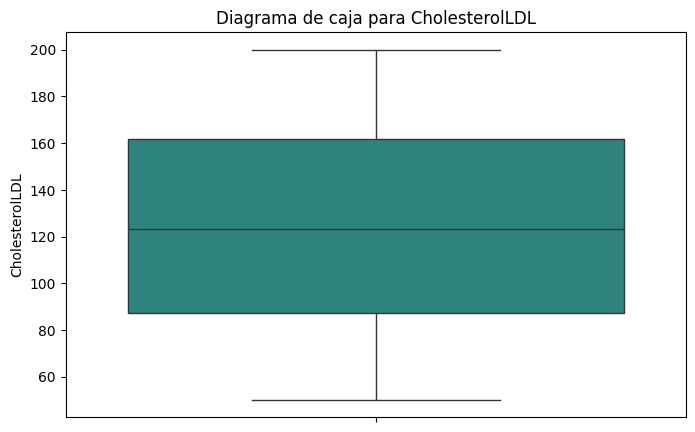

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


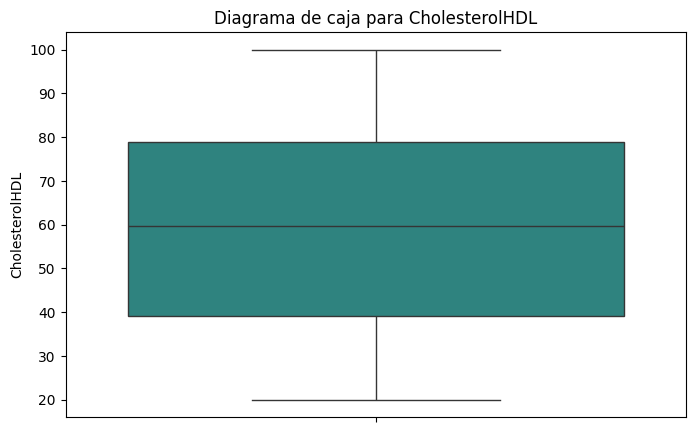

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


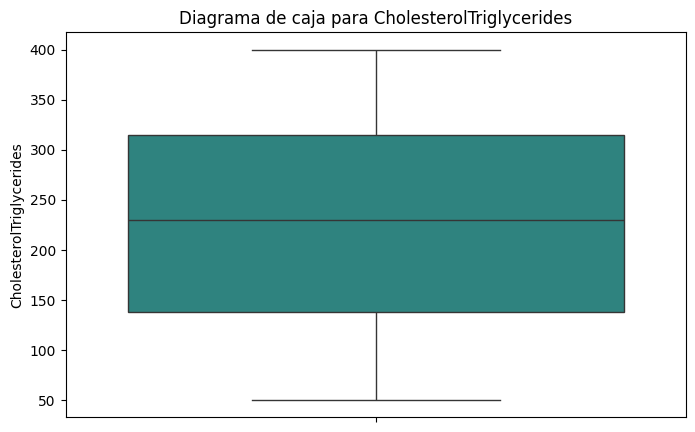

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


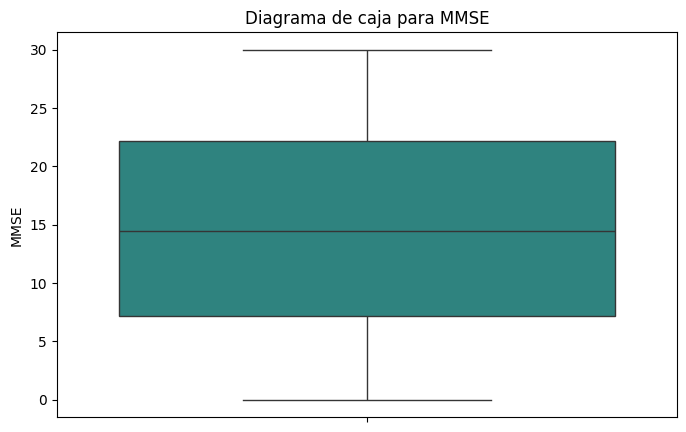

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


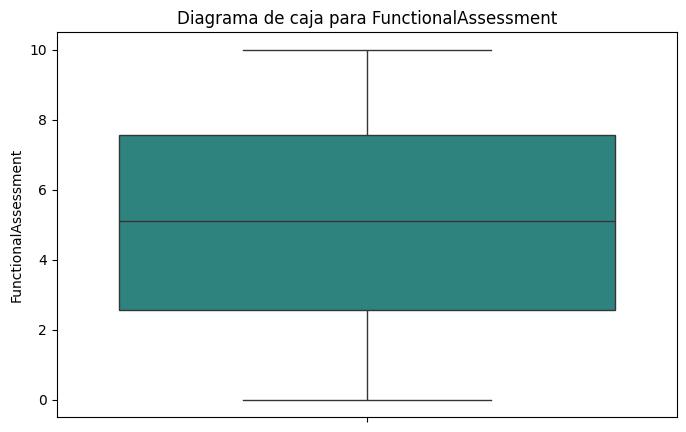

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


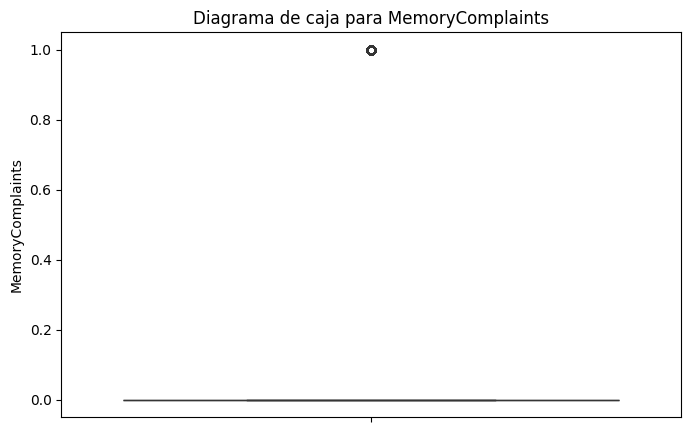

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


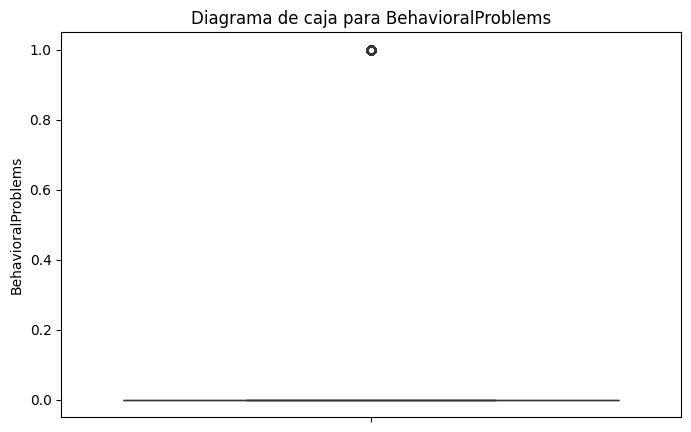

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


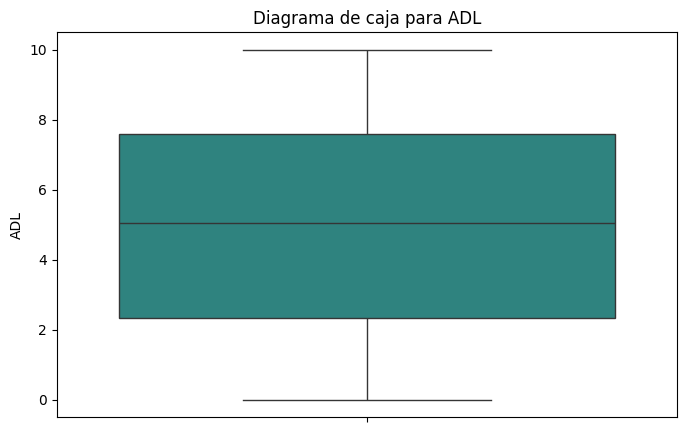

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


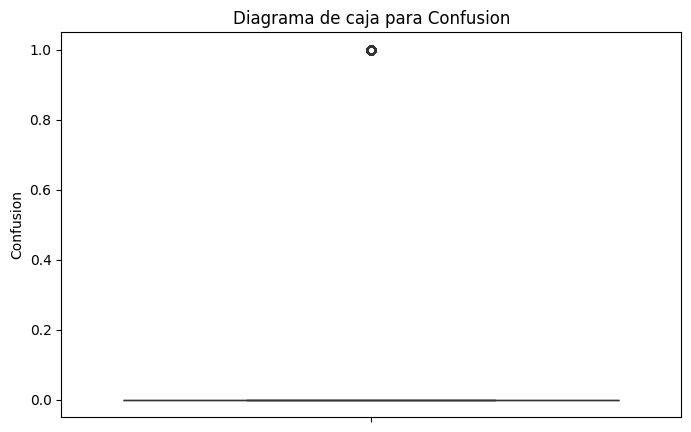

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


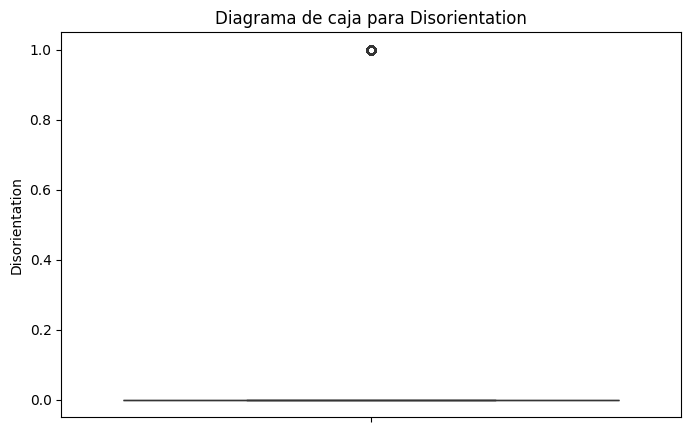

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


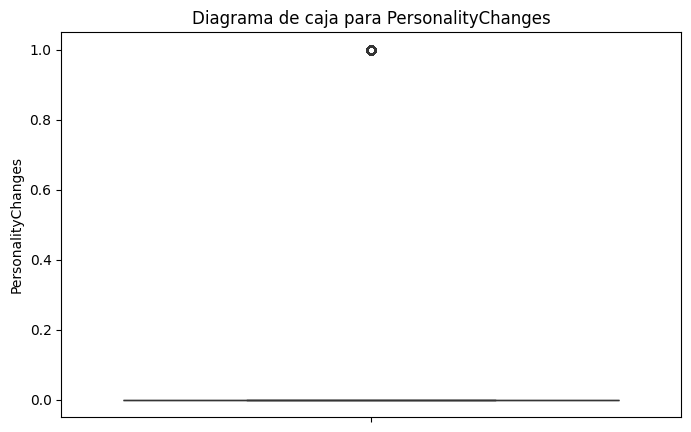

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


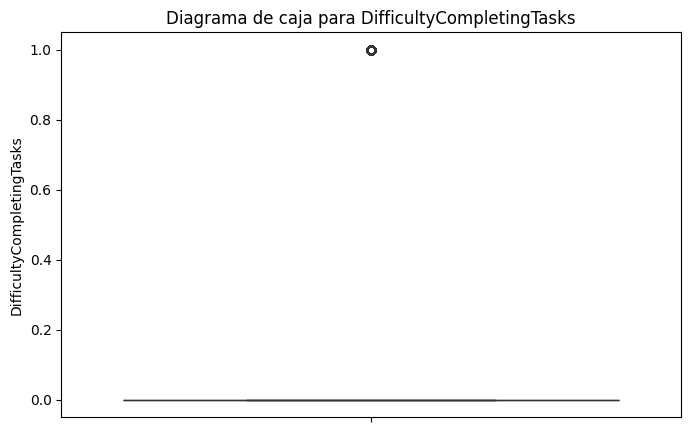

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


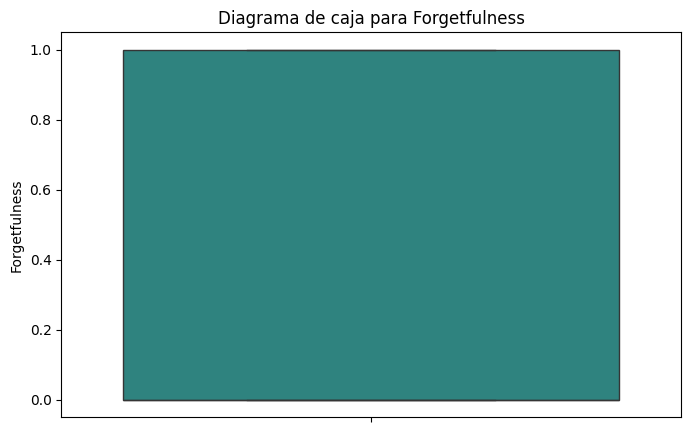

<ipython-input-56-278d970d126e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, palette='viridis')


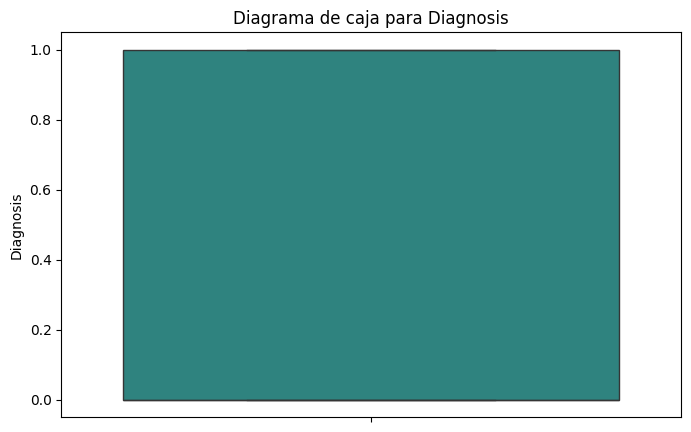

In [56]:
# Outliers con diagramas de caja
for column in num_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=column, data=df, palette='viridis')
    plt.title(f"Diagrama de caja para {column}")
    plt.show()

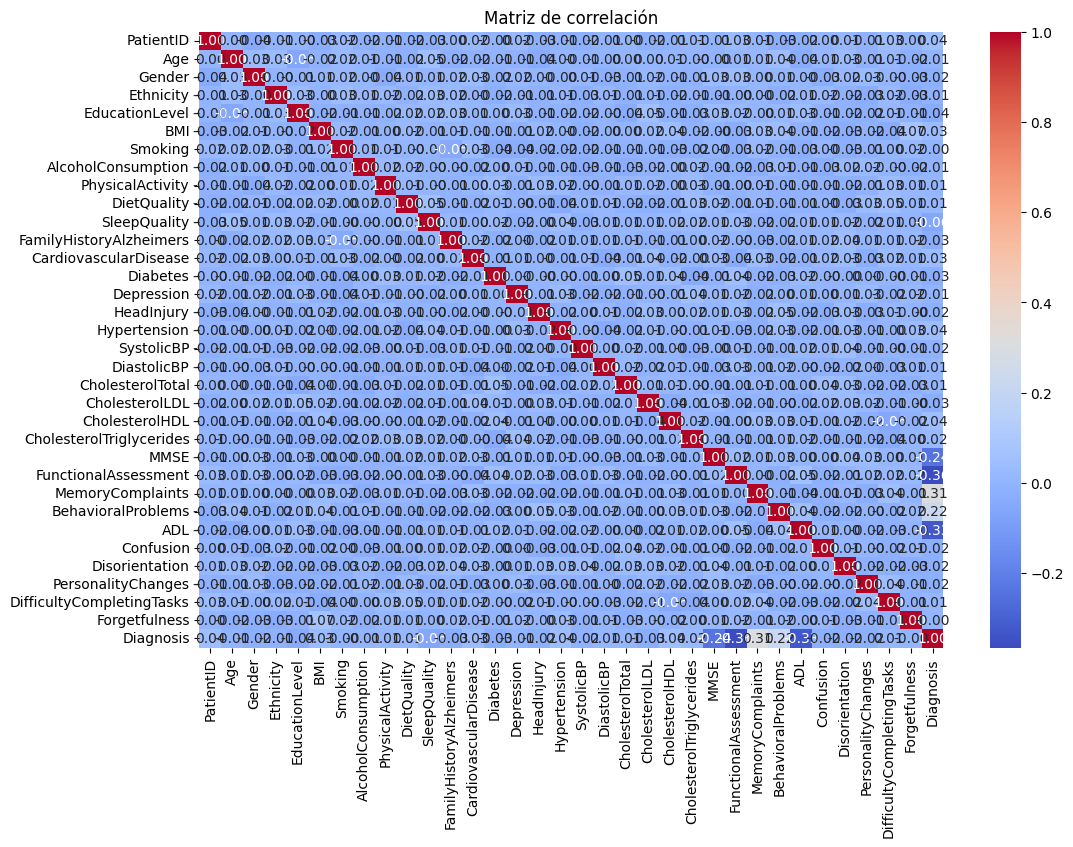

In [17]:
#Paso7. # Apartado C. Relaciones y correlaciones entre las variables
# Matriz de correlación
plt.figure(figsize=(12, 8))
# Se seleccionan solo caracteristicas numéricas para el analisis de correlación
numerical_df = df.select_dtypes(include=['number']) # Esta línea selecciona columnas con tipos de datos numéricos
corr_matrix = numerical_df.corr() # Calcular la matriz de correlación solo en datos numéricos
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación")
plt.show()

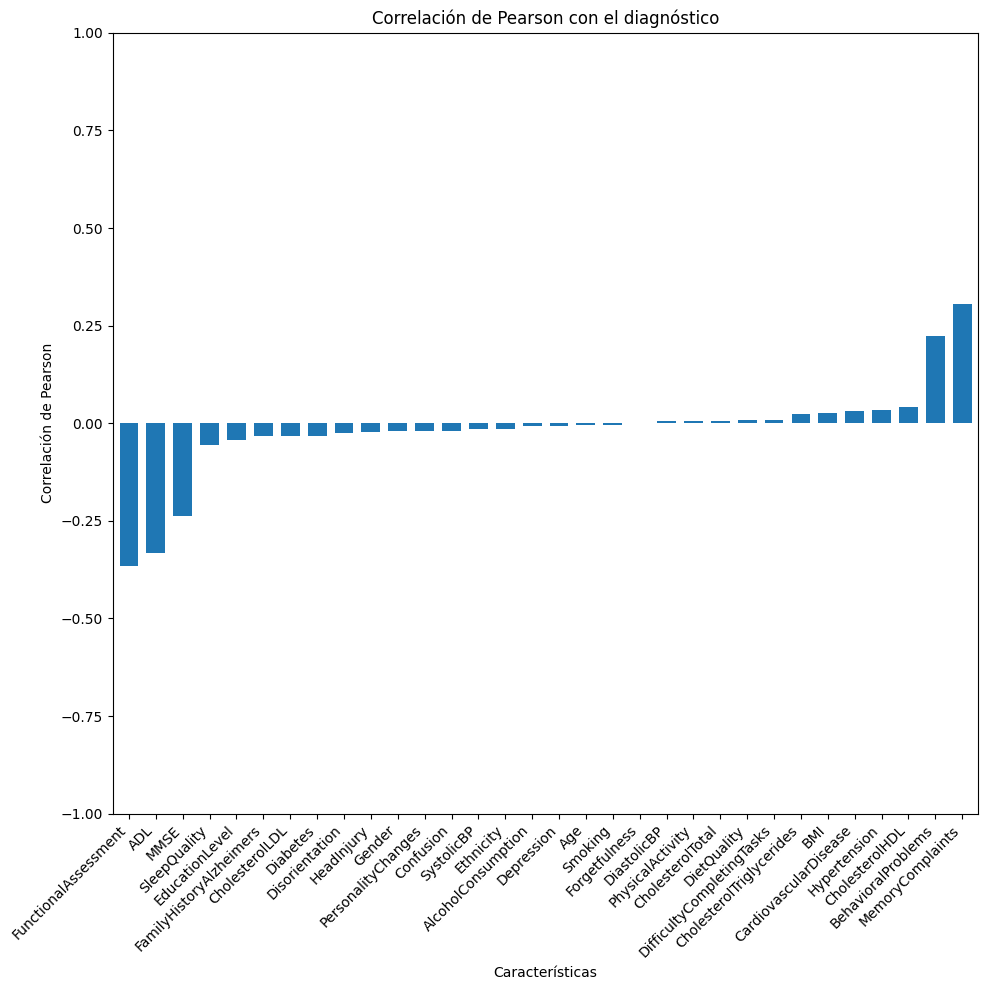

In [71]:
 #Calculé los coeficientes de correlación de Pearson
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Establecí el tamaño de la figura.
plt.figure(figsize=(10, 10))

# Cree un diagrama de barras de los coeficientes de correlación de Pearson
ax = correlations.plot(kind='bar', width=0.7)
# Establecer los límites y etiquetas del eje y
ax.set(ylim=[-1, 1], ylabel='Correlación de Pearson', xlabel='Características',
       title='Correlación de Pearson con el diagnóstico')

# Gire las etiquetas del eje x para una mejor legibilidad
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


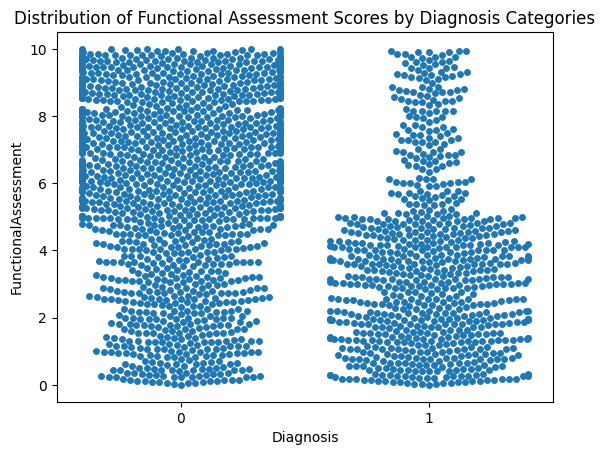

In [72]:
#Tracé la distribución de las columnas más correlacionadas en diferentes categorías de 'Diagnóstico'.
sns.swarmplot(data=df, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


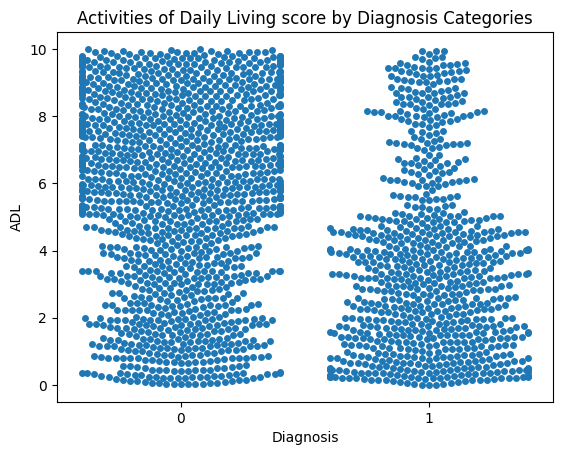

In [73]:
sns.swarmplot(data=df, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


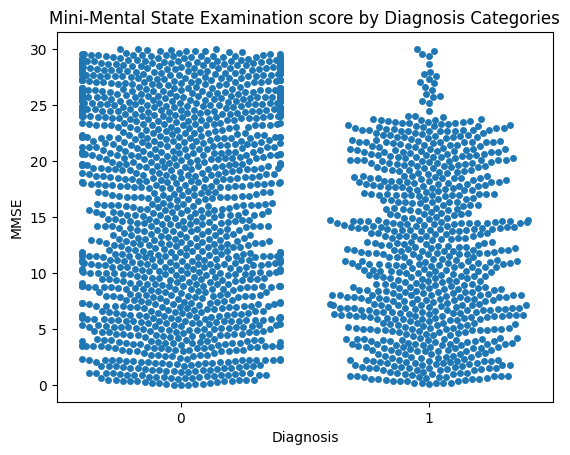

In [74]:
sns.swarmplot(data=df, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()


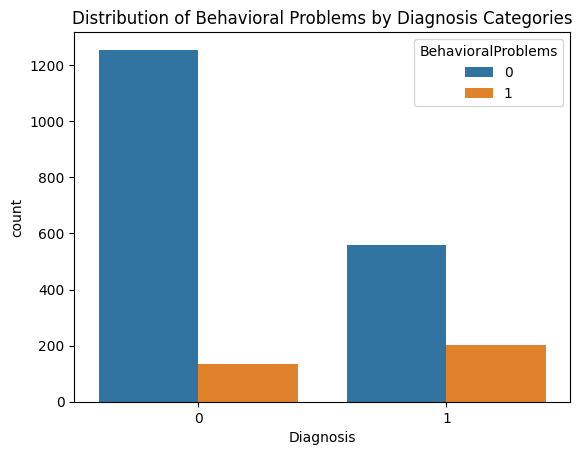

In [75]:
sns.countplot(data=df, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

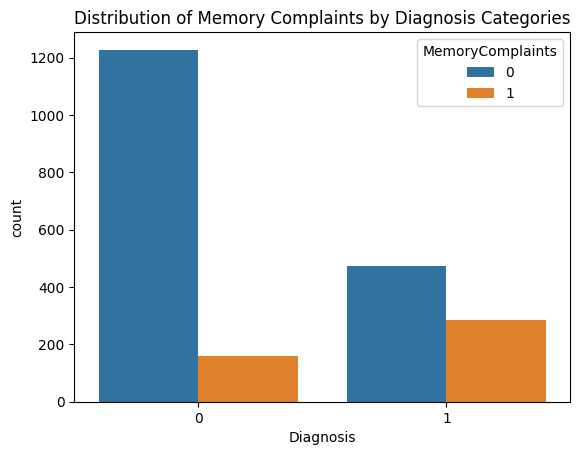

In [76]:
sns.countplot(data=df, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
X, y = df.drop('Diagnosis', axis =1), df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [81]:
#Modelos que no son sensibles a la escala
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
from sklearn.naive_bayes import GaussianNB
nbcl= GaussianNB()
nbcl.fit(X_train, y_train)

GaussianNB()

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl.fit(X_train, y_train)


GradientBoostingClassifier()

In [88]:
#Modelos que si son sensibles a la escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [92]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [93]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [94]:
forest.score(X_test, y_test)

0.9

In [95]:
nbcl.score(X_test, y_test)

0.8046511627906977

In [96]:
gbcl.score(X_test, y_test)

0.9418604651162791

In [97]:
knn.score(X_test_scaled, y_test)

0.7209302325581395

In [99]:
log.score(X_test_scaled, y_test)

0.8302325581395349

In [102]:
svm.score(X_test_scaled, y_test)

0.8197674418604651

In [110]:
#Diferencia entre Accuracy y Precision, y Recalls
from sklearn.metrics import recall_score
y_pred = forest.predict(X_test)
print('Forest:',recall_score(y_test, y_pred))

y_pred = nbcl.predict(X_test)
print('Naive Bayes:',recall_score(y_test, y_pred))

y_pred = gbcl.predict(X_test)
print('gbcl:', recall_score(y_test, y_pred))

y_pred = knn.predict(X_test_scaled)
print('knn:', recall_score(y_test, y_pred))

y_pred = log.predict(X_test_scaled)
print('log:', recall_score(y_test, y_pred))

y_pred = svm.predict(X_test_scaled)
print('svm:', recall_score(y_test, y_pred))

Forest: 0.765079365079365
Naive Bayes: 0.6666666666666666
gbcl: 0.8920634920634921
knn: 0.44126984126984126
log: 0.7142857142857143
svm: 0.6666666666666666


In [ ]:
#Para el Recall el que mejor funciona es gbcl.

In [137]:
#Ajuste de hiperparametros
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}
gbcl = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gbcl, param_grid, cv=5, scoring='recall', n_jobs=-1,  verbose=0)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
best_gbcl = grid_search.best_estimator_

In [ ]:
best_gbcl

In [ ]:
#Analisis de features
import numpy as np
feature_importances = best_gbcl.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
